#  Car price prediction

In [187]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading the dataset

In [188]:
pd.set_option("display.max_Columns",None)
car_dataset = pd.read_csv(r"C:\Users\hp\Downloads\CarPrice_Assignment.csv")
car_dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data cleaning and EDA 

In [189]:
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [190]:
# Checking if there is any duplicates
car_dataset.duplicated().sum()

0

### Exploratory Data Analysis

### Let's have a look at the fuel type

In [191]:
car_fueltype = car_dataset["fueltype"].value_counts()
car_fueltype

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:ylabel='fueltype'>

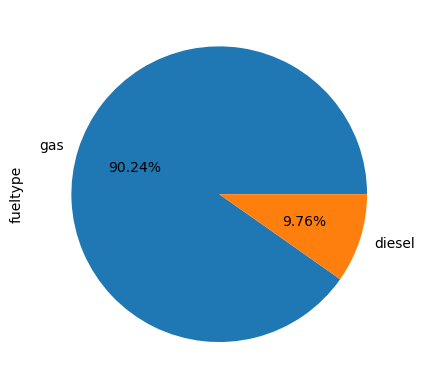

In [192]:
car_fueltype.plot(kind="pie",autopct="%.2f%%")

Most cars are using gas than diesel

## Different Car Aspiration

In [193]:
car_aspiration = car_dataset["aspiration"].value_counts()
car_aspiration

std      168
turbo     37
Name: aspiration, dtype: int64

Text(0, 0.5, 'Frequency')

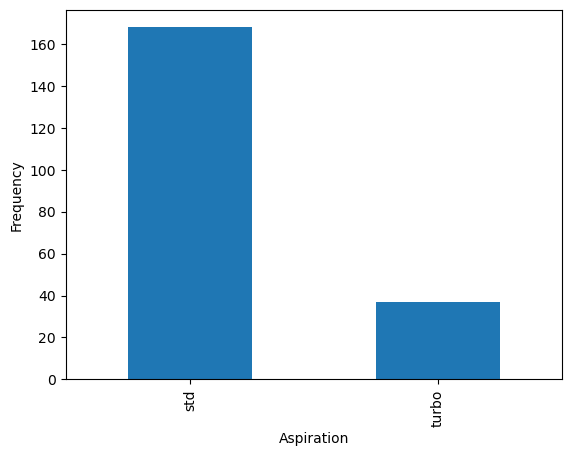

In [194]:
car_aspiration.plot(kind="bar")
plt.xlabel("Aspiration")
plt.ylabel("Frequency")

Most cars have std aspiration while few cars have turbo

# Frequencies of the door number

In [195]:
car_doornumber = car_dataset["doornumber"].value_counts()
car_doornumber

four    115
two      90
Name: doornumber, dtype: int64

Text(0.5, 1.0, 'Various Car door numbers and their frequencies')

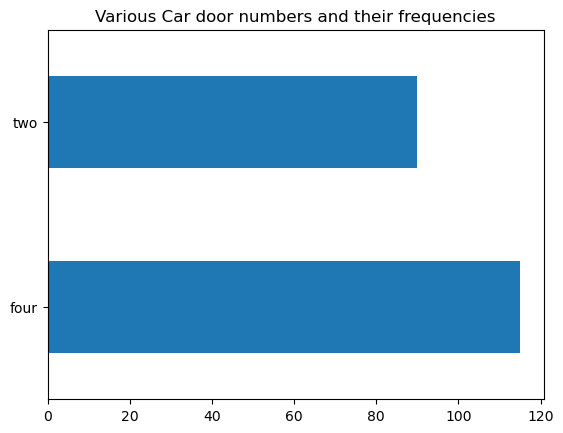

In [196]:
car_doornumber.plot(kind="barh")
plt.title("Various Car door numbers and their frequencies")

Most cars have 4 door numbers 

### Different Car bodies

In [197]:
car_bodies = car_dataset["carbody"].value_counts()
car_bodies

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0.5, 1.0, 'Various car bodies and the frequencies')

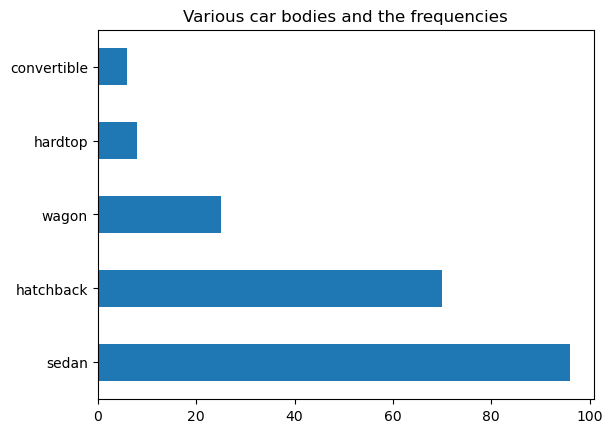

In [198]:
car_bodies.plot(kind="barh")
plt.title("Various car bodies and the frequencies")

## The different drivewheels

In [199]:
drive_wheels = car_dataset["drivewheel"].value_counts()
drive_wheels

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Text(0.5, 0, 'Frequencies')

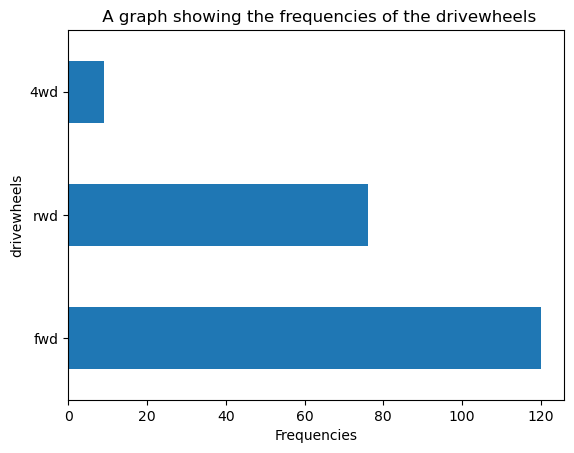

In [200]:
drive_wheels.plot(kind="barh")
plt.title(" A graph showing the frequencies of the drivewheels")
plt.ylabel("drivewheels")
plt.xlabel("Frequencies")

## Engine Locations

In [201]:
engine_location = car_dataset["enginelocation"].value_counts()
engine_location

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:ylabel='enginelocation'>

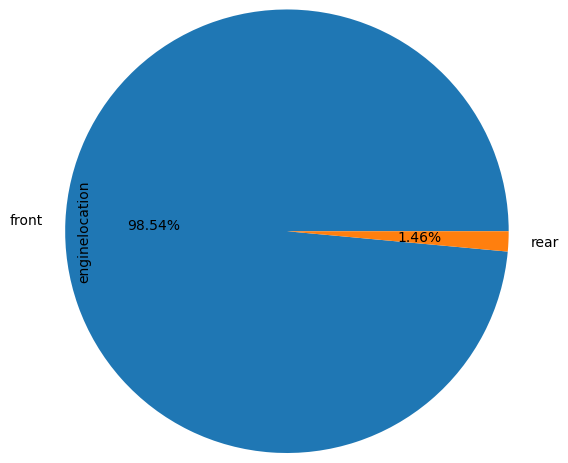

In [202]:
engine_location.plot(kind="pie",autopct="%.2f%%",radius=1.5)


Many cars have their engine location at the front while very few cars have their engine locations at the back

## Distribution of the wheel base

In [203]:
car_wheelbase = car_dataset["wheelbase"]

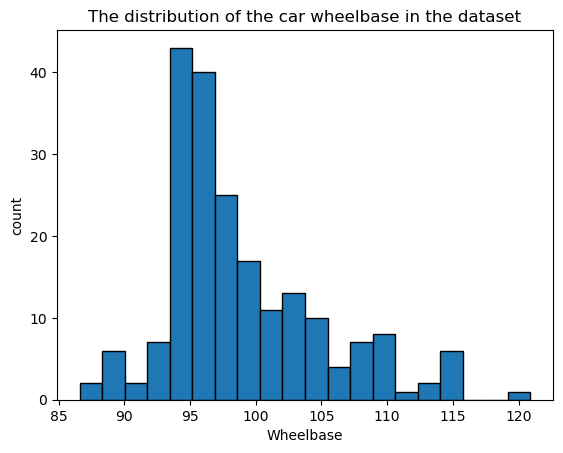

In [204]:
plt.hist(x=car_wheelbase,edgecolor="black",bins=20)
plt.title("The distribution of the car wheelbase in the dataset")
plt.xlabel("Wheelbase")
plt.ylabel("count")
plt.show()

## Distribution of car length

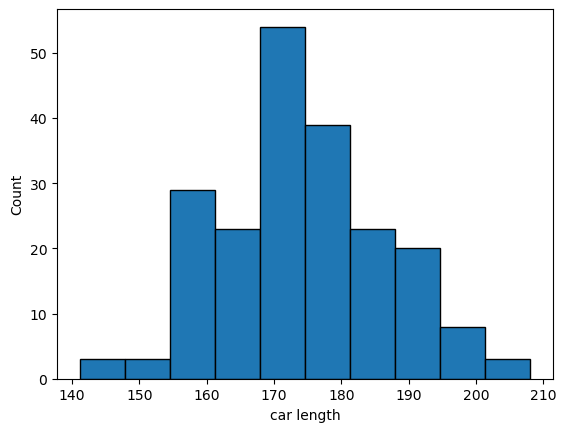

In [205]:
car_length = car_dataset["carlength"]
plt.hist(x=car_length,edgecolor="black")
plt.xlabel("car length")
plt.ylabel("Count")
plt.show()

We can conclude that most cars have their length ranging between 167 to 183

## Distribution of carwidth

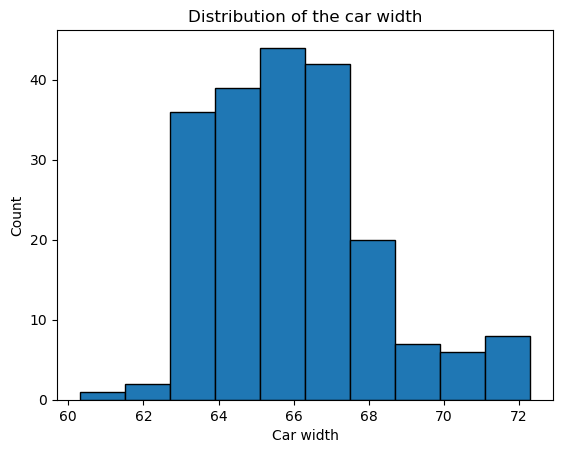

In [206]:
car_width = car_dataset["carwidth"]
plt.hist(car_width,edgecolor="black")
plt.xlabel("Car width")
plt.ylabel("Count")
plt.title("Distribution of the car width")
plt.show()

Most cars have their width ranging between 62.8 and 68.8

## Distribution of the curb weight

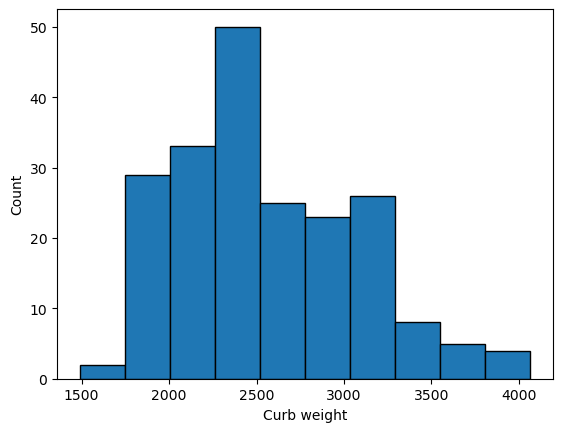

In [207]:
curb_weight = car_dataset["curbweight"]
plt.hist(x=curb_weight,edgecolor="black")
plt.xlabel("Curb weight")
plt.ylabel("Count")
plt.show()

## Different engine types

In [208]:
engine_types = car_dataset["enginetype"].value_counts()

Text(0, 0.5, 'Engine types')

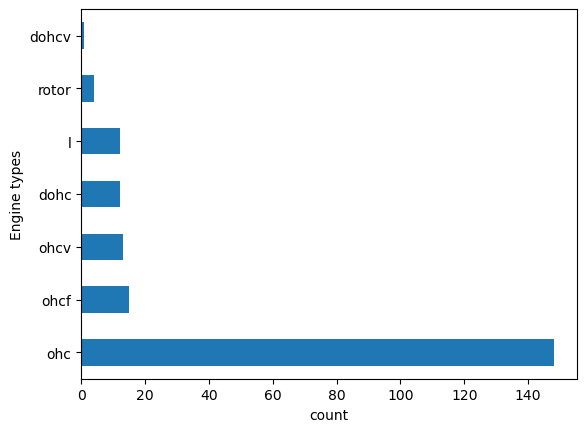

In [209]:
engine_types.plot(kind="barh")
plt.xlabel('count')
plt.ylabel("Engine types")

most cars have ohc engine type

## Cars and their number of cylinders

Text(0, 0.5, 'Number of cylinders')

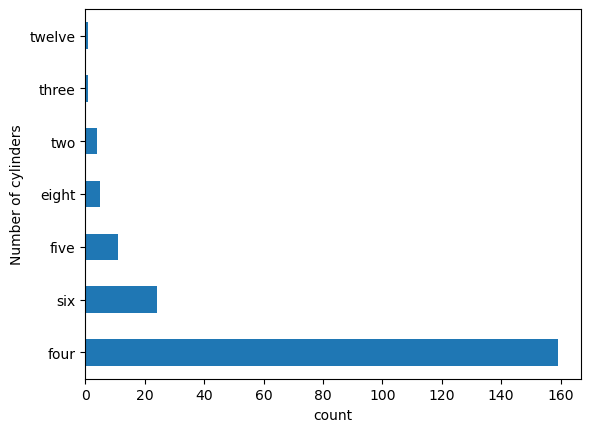

In [210]:
cylinder_number = car_dataset["cylindernumber"].value_counts()
cylinder_number.plot(kind="barh")
plt.xlabel("count")
plt.ylabel("Number of cylinders")

## Let's look at the distribution of the engine size 

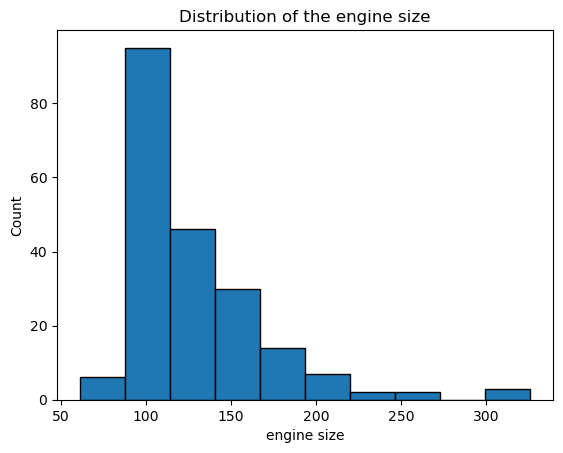

In [211]:
engine_size = car_dataset["enginesize"]
plt.hist(x=engine_size,edgecolor="black",bins=10)
plt.xlabel("engine size")
plt.ylabel('Count')
plt.title("Distribution of the engine size")
plt.show()

# Let's have a look at various fuel systems

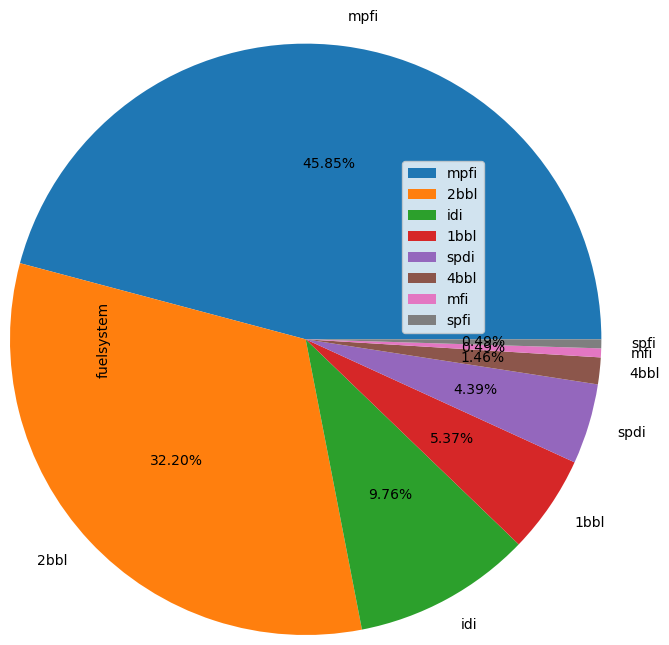

In [212]:
fuel_system = car_dataset["fuelsystem"]
fuel_system_counts = fuel_system.value_counts()
fuel_system_counts.plot(kind="pie",autopct="%.2f%%",radius=2)
plt.legend()

## Distribution of the boreratio

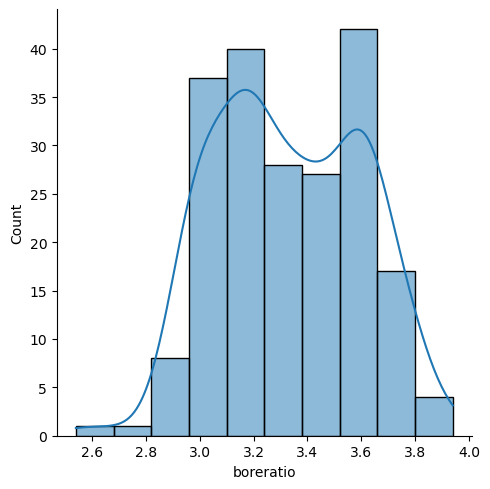

In [213]:
boreratio = car_dataset["boreratio"]
boreratio_counts = boreratio.value_counts()
sns.displot(x="boreratio",data=car_dataset,kde=True)

## Distribution of the stroke

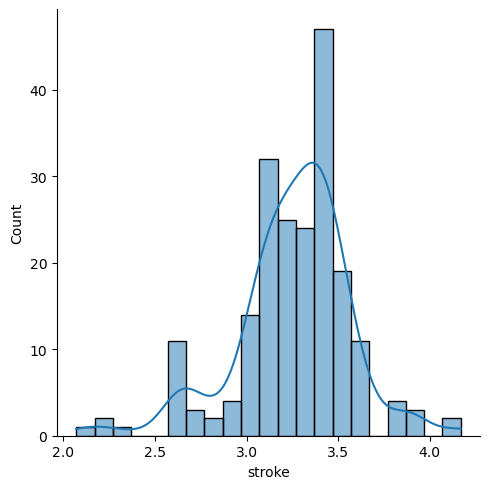

In [214]:
sns.displot(x="stroke",data=car_dataset,kde=True)

## Distribution of compressionratio

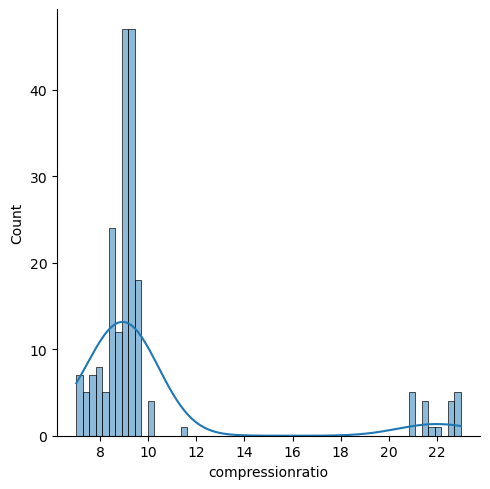

In [215]:
sns.displot(x="compressionratio",data=car_dataset,kde=True)

## Distribution of the various horsepowers

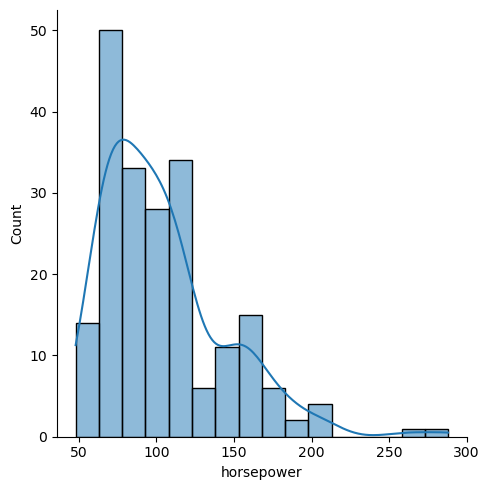

In [216]:
sns.displot(x="horsepower",data=car_dataset,kde=True)

## Distribution of peakrpm

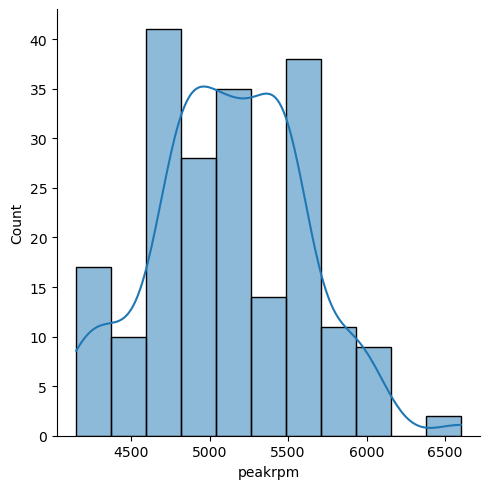

In [217]:
sns.displot(x="peakrpm",data=car_dataset,kde=True)

##  Distribution of citympg

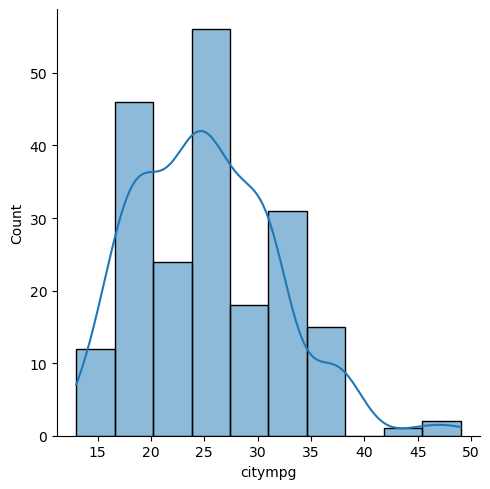

In [218]:
sns.displot(x="citympg",data=car_dataset,kde=True)

## Distribution of highwaympg

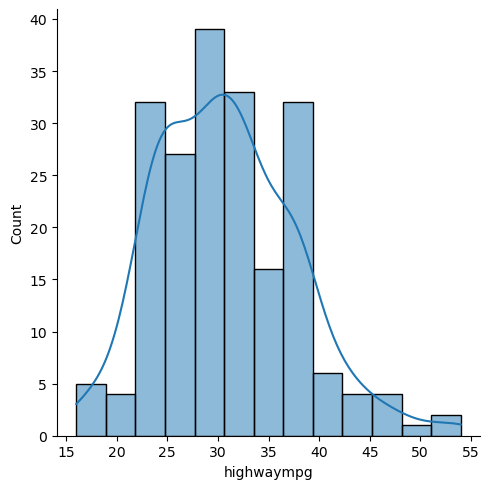

In [219]:
sns.displot(x="highwaympg",data=car_dataset,kde=True)

##  Correlation between the various columns

<AxesSubplot:>

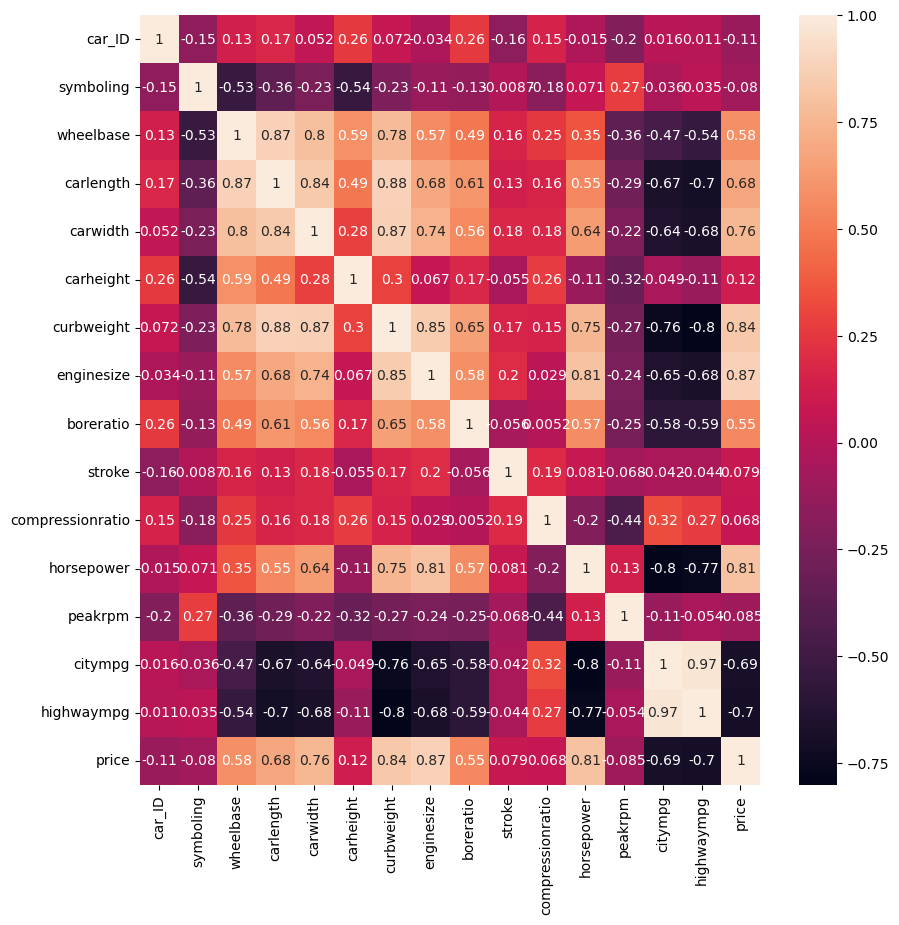

In [255]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(car_dataset.corr(),annot=True)

# Creating a Machine Learning Model

### Before we create the model, we need to convert categorical columns into numeric variables

In [220]:
car_dataset["fueltype"] = car_dataset["fueltype"].replace({"gas":0, "diesel":1})

In [221]:
car_dataset["aspiration"] = car_dataset["aspiration"].replace({"std":0, "turbo":1})

In [222]:
car_dataset["doornumber"] = car_dataset["doornumber"].replace({"two":2,"four":4})

In [223]:
car_dataset["carbody"] = car_dataset["carbody"].replace({'convertible':0, 'hatchback':1, 'sedan':2, 'wagon':3, 'hardtop':4
                                                         })

In [224]:
car_dataset["drivewheel"] = car_dataset["drivewheel"].replace({"rwd":0,"fwd":1,"4wd":2})

In [225]:
car_dataset["enginelocation"] = car_dataset["enginelocation"].replace({"front":0,"rear":1})

In [226]:
car_dataset["enginetype"] = car_dataset["enginetype"].replace({'dohc':0, 'ohcv':1, 'ohc':2, 'l':3, 'rotor':4, 'ohcf':5, 'dohcv':6})

In [227]:
car_dataset["cylindernumber"] = car_dataset["cylindernumber"].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [228]:
car_dataset["fuelsystem"] = car_dataset["fuelsystem"].replace({'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7})

## Dropping the columns that we won't use in training the model

In [239]:
x = car_dataset.drop(["car_ID","CarName","price"],axis=1)
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,2,1,0,0,94.5,171.2,65.5,52.4,2823,1,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,4,2,1,0,99.8,176.6,66.2,54.3,2337,2,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,4,2,2,0,99.4,176.6,66.4,54.3,2824,2,5,136,0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,4,2,0,0,109.1,188.8,68.9,55.5,2952,2,4,141,0,3.78,3.15,9.5,114,5400,23,28
201,-1,0,1,4,2,0,0,109.1,188.8,68.8,55.5,3049,2,4,141,0,3.78,3.15,8.7,160,5300,19,25
202,-1,0,0,4,2,0,0,109.1,188.8,68.9,55.5,3012,1,6,173,0,3.58,2.87,8.8,134,5500,18,23
203,-1,1,1,4,2,0,0,109.1,188.8,68.9,55.5,3217,2,6,145,6,3.01,3.40,23.0,106,4800,26,27


In [230]:
# These are the columns that we need
columns = x.columns
columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [231]:
x_values = car_dataset[columns]

In [232]:
y_values = car_dataset["price"]

In [233]:
x_train,x_test,y_train,y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=42)

In [234]:
model = LinearRegression()

In [235]:
model.fit(x_train,y_train)

LinearRegression()

In [236]:
model.predict(x_test)

array([25173.73944785, 15393.96921197,  9896.34998168, 12727.61282207,
       25301.99056964,  5648.27584911,  6802.70172855,  7397.02741537,
       10485.71768212,  6519.6137561 , 15889.69639346,  7411.64108821,
       16109.55163556, 10543.33144758, 40963.42272206,  7274.72037996,
       -1601.6608205 , 14540.35178089, 10438.44120587, 10737.8244449 ,
       11093.93965505, 20516.81467046,  4904.4830329 ,  2644.31757997,
        7220.12472464, 24279.76150822, 12753.69089857, 16712.85391711,
        5689.94563885, 16585.78534799, 25224.77237694,  7650.99974483,
        5186.47481336, 23768.02022709,  7495.34765849, 23112.78691086,
       10315.66348404,  9772.81200675,  5873.2736591 , 14600.17215122,
        9034.94540968, 12558.94144029, 19835.13264846,  5912.82799525,
        6682.51501275,  9073.98929923,  7650.99974483,  8070.46677178,
       18532.14919718, 15427.86030391,  5211.83083859, 21022.03427405,
        3438.92794714,  9772.55873942,  5676.30161346, 14261.24479716,
      

In [237]:
x_test

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0,0,0,4,2,0,0,103.5,189.0,66.9,55.7,3230,2,6,209,0,3.62,3.390,8.00,182,5400,16,22
9,0,0,1,2,1,2,0,99.5,178.2,67.9,52.0,3053,2,5,131,0,3.13,3.400,7.00,160,5500,16,22
100,0,0,0,4,2,1,0,97.2,173.4,65.2,54.7,2302,2,4,120,1,3.33,3.470,8.50,97,5200,27,34
132,3,0,0,2,1,1,0,99.1,186.6,66.5,56.1,2658,2,4,121,0,3.54,3.070,9.31,110,5250,21,28
68,-1,1,1,4,3,0,0,110.0,190.9,70.3,58.7,3750,2,5,183,6,3.58,3.640,21.50,123,4350,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,0,0,2,1,0,0,95.3,169.0,65.7,49.6,2380,4,2,70,5,3.33,3.255,9.40,101,6000,17,23
128,3,0,0,2,0,0,1,89.5,168.9,65.0,51.6,2800,5,6,194,0,3.74,2.900,9.50,207,5900,17,25
76,2,0,0,2,1,1,0,93.7,157.3,64.4,50.8,1918,2,4,92,1,2.97,3.230,9.40,68,5500,37,41
144,0,0,0,4,2,2,0,97.0,172.0,65.4,54.3,2385,5,4,108,1,3.62,2.640,9.00,82,4800,24,25


## Accuracy of my model

In [238]:
accuracy = model.score(x_test,y_test)
accuracy

0.8246264724682422

In [266]:
model.predict([[3,0,0,4,3,1,0,89.4,160,60,55,2900,1,4,140,6,3.78,2.9,8.0,115,5300,22,27]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8603.36074461])